## How to create a sequence and use it for deep learning trained

In [83]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,TensorDataset
from torch.utils.data import DataLoader


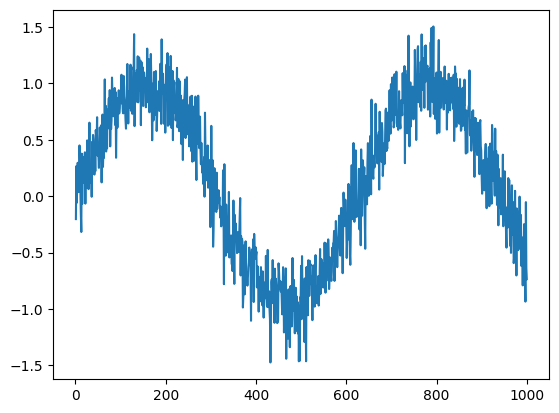

In [84]:
T = 1000
time = torch.arange(1,T+1,dtype=torch.float)
x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))
plt.plot(time,x)

In [85]:
# 构建数据集
tau = 4
# 构建空的feature
features = torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i] = x[i:T-tau+i]
labels = x[tau:].reshape((-1,1))
# dataset = TensorDataset(features,labels)

class mydataset(Dataset):
    def __init__(self,featrues,labels):
        ''' 继承 dataset构建自己的dataset'''
        super().__init__()
        self.X = features
        self.y =labels
    
    def __getitem__(self, index):
        return self.X[index],self.y[index]

    def __len__(self):
        return self.X.size(0)

dataset = mydataset(features,labels)


In [86]:
batchsize = 16
data_iter = DataLoader(dataset,batch_size=batchsize,shuffle=True)

In [87]:
class net(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer1 = nn.Linear(tau,10)
        self.layer2 = nn.Linear(10,1)
    
    def forward(self,X):
        '''X 的输入1*4'''
        y1 = nn.functional.relu(self.layer1(X))
        return self.layer2(y1)

def init_weigt(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

model = net()
model.apply(init_weigt)

net(
  (layer1): Linear(in_features=4, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [88]:
loss = nn.MSELoss(reduce='none')

/Users/chenxia/miniconda3/envs/tf2/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [89]:
opt = torch.optim.Adam(model.parameters(),lr=0.03)

In [90]:
epoches = 10
model.train()
for epoch in range(epoches):
    for X,y in data_iter:
        opt.zero_grad()
        y_hat = model(X)
        l = loss(y_hat,y)
        l.mean().backward()
        opt.step()
    print(l.mean())

tensor(0.0353, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0460, grad_fn=<MeanBackward0>)
tensor(0.1192, grad_fn=<MeanBackward0>)
tensor(0.0368, grad_fn=<MeanBackward0>)
tensor(0.0397, grad_fn=<MeanBackward0>)
tensor(0.0593, grad_fn=<MeanBackward0>)
tensor(0.0929, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)
tensor(0.0381, grad_fn=<MeanBackward0>)


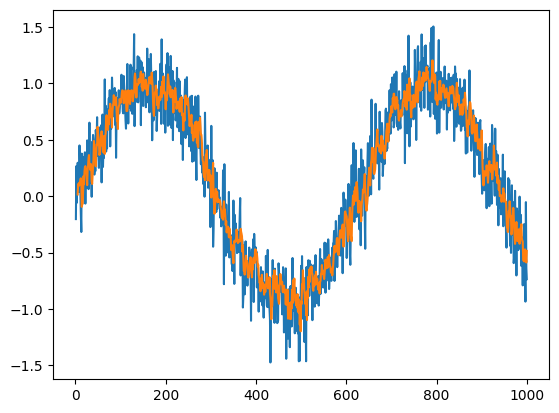

In [100]:
plt.plot(time,x)
plt.plot(time[tau:],model(features).detach())
# # 完全使用预测作为真值
# i=tau

# res = x[:tau]
# while len(res) < T:
#     # print(model(res[-4:]))
#     res = torch.concat((res,model(res[-4:])))
# plt.plot(time,res.detach())
